Import libraries used

In [15]:
import os
import pandas as pd
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult
import numpy as np
from scipy.stats import johnsonsu, kstest
import statsmodels
import seaborn as sns
import sys

### Statistical Analysis for Energy Spot Price Forecasting on 2017

Import the Dataset

In [2]:
# Load dataset
dir_path = os.getcwd()
dataset = pd.read_csv(os.path.join(dir_path, 'data', 'datasets', "EM_market__2015-01-03__2017-12-31.csv"))
dataset["index"] = dataset["Date"] +" "+ dataset["Hour"].astype(str) + ".00"
dataset.set_index("index", inplace = True)
# Remove not informative columns
dataset = dataset.drop(["IDX__global", "IDX__step", "IDX__sub_step","Date"], axis=1)
dataset["FUTU__hour_cos"]= np.cos(dataset["Hour"]*2*np.pi/24)
dataset["FUTU__hour_sin"]= np.sin(dataset["Hour"]*2*np.pi/24)
dataset = dataset.drop("Hour", axis=1)
dataset

,TARG__EM_price,FUTU__EM_load_f,FUTU__EM_solar_f,FUTU__EM_wind_f,CONST__wd_sin,CONST__wd_cos,CONST__mnth_sin,CONST__mnth_cos,CONST__yd_sin,CONST__yd_cos,FUTU__hour_cos,FUTU__hour_sin
index,,,,,,,,,,,,
2015-01-03 0.00,52.10,5947.0,0.0,273.0,-0.974928,-0.222521,0.5,0.866025,0.05162,0.998667,1.000000,0.000000
2015-01-03 1.00,47.84,5406.0,0.0,261.0,-0.974928,-0.222521,0.5,0.866025,0.05162,0.998667,0.965926,0.258819
2015-01-03 2.00,43.66,4937.0,0.0,250.0,-0.974928,-0.222521,0.5,0.866025,0.05162,0.998667,0.866025,0.500000
2015-01-03 3.00,43.66,4592.0,0.0,238.0,-0.974928,-0.222521,0.5,0.866025,0.05162,0.998667,0.707107,0.707107
2015-01-03 4.00,41.98,4391.0,0.0,224.0,-0.974928,-0.222521,0.5,0.866025,0.05162,0.998667,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19.00,32.90,5955.0,0.0,2772.0,-0.781831,0.623490,-0.0,1.000000,-0.00000,1.000000,0.258819,-0.965926
2017-12-31 20.00,33.00,6208.0,0.0,2545.0,-0.781831,0.623490,-0.0,1.000000,-0.00000,1.000000,0.500000,-0.866025
2017-12-31 21.00,32.90,6205.0,0.0,2377.0,-0.781831,0.623490,-0.0,1.000000,-0.00000,1.000000,0.707107,-0.707107


Data description

In [3]:
dataset.describe()

,TARG__EM_price,FUTU__EM_load_f,FUTU__EM_solar_f,FUTU__EM_wind_f,CONST__wd_sin,CONST__wd_cos,CONST__mnth_sin,CONST__mnth_cos,CONST__yd_sin,CONST__yd_cos,FUTU__hour_cos,FUTU__hour_sin
count,26256.000000,26256.000000,26256.000000,26256.000000,26256.000000,26256.000000,26256.000000,26256.000000,26256.000000,26256.000000,2.625600e+04,2.625600e+04
mean,47.440622,5623.924722,93.747715,1304.060139,-0.001606,0.000367,-0.005508,-0.003501,-0.000031,-0.000914,-5.554498e-17,-1.846989e-17
std,14.233992,965.967008,121.804770,982.682691,0.707481,0.706757,0.706128,0.708080,0.707443,0.706797,7.071202e-01,7.071202e-01
min,0.000000,3346.000000,0.000000,0.000000,-0.974928,-0.900969,-1.000000,-1.000000,-0.999991,-0.999963,-1.000000e+00,-1.000000e+00
25%,39.600000,4778.000000,0.000000,517.750000,-0.781831,-0.900969,-0.866025,-0.866025,-0.705584,-0.708627,-7.071068e-01,-7.071068e-01
50%,48.060000,5609.000000,3.500000,1050.000000,0.000000,-0.222521,0.000000,0.000000,-0.000000,0.004304,-6.123234e-17,6.123234e-17
75%,56.600000,6367.000000,194.000000,1882.000000,0.781831,0.623490,0.500000,0.866025,0.705584,0.702527,7.071068e-01,7.071068e-01
max,101.990000,8674.000000,523.000000,4507.000000,0.974928,1.000000,1.000000,1.000000,0.999991,1.000000,1.000000e+00,1.000000e+00


# Gaussian and JSU test for different seasons

Define the decomposition function and the test function

In [4]:
def multiseasonal_decomposition(samples, periods= [12,24]):
    """ Decompose a Time series taking a multiple period seasonality
    
    :param samples: observed time series
    :param periods: periods to decompose the seasonality
    :return: combined_result: decomposed time series class
    
    """
    x = samples
    combined_seasonal = 0
    # Decompose the signal with multiple seasonalities
    for p in periods:
         res = seasonal_decompose(x, model='additive', period=p)
         x = x - res.seasonal
         combined_seasonal = combined_seasonal + res.seasonal
    # Create a new DecomposeResult with the combined seasonal component
    combined_result = DecomposeResult(
        observed= samples,
        seasonal= combined_seasonal,
        trend= res.trend,
        resid= res.resid
    )
    return combined_result
def Normal_JSU_test(result, hyp_threshold, period):
    """ Do the Jarque bera test and the Kolmogorov Smirnov test for the residuals of the decomposed time    series
    :param result: Decomposed time series class of statmodels
    :param hyp_threshold: threshold to affirm the null hypotesis for the tests
    :param period: Maximum period in the decomposition (to avoid Nan in results)
    """
    for ii in range(period):
        # Do Jarque Bera test for all the hours
        stat, p_value = jarque_bera(result.resid[ ii+period//2:-period//2:24])
        if p_value > hyp_threshold:
            hyp = "Normality assumpition good"
        else:
            hyp = "Normality assumption fail"
        print("Jarque-bera Test at hour", str(ii) + ".00", int(p_value * 10000)/100, "%", hyp)
        
        # Fit the data in a Johnson distribution
        params = johnsonsu.fit(result.resid[ii+period//2:-period//2:24])
    
        # Do the Kolmogorov-Smirnov test for JSU
        D, p_value = kstest(result.resid[ ii+period//2:-period//2:24], 'johnsonsu', args=params)
    
        if p_value > hyp_threshold:
            hyp = "JSU assumpition good"
        else:
            hyp = "JSU assumption fail"
    
        print("Kolmogorov-Smirnov Test at hour", str(ii) + ".00", int(p_value * 10000)/100, "%", hyp)
    
    # Do the Jarque Bera test for all the residuals
    stat, p_value = jarque_bera(result.resid[+period//2:-period//2])
    if p_value > hyp_threshold:
        hyp = "Normality assumpition good"
    else:
        hyp = "Normality assumption fail"
    print("General Jarque-bera Test ", int(p_value * 10000)/100, "%", hyp)
    
    
    # Find parameters for Johnson distribution
    params = johnsonsu.fit(result.resid[+period//2:-period//2])
    
    # Do Kolmogorov-Smirnov test
    D, p_value = kstest(result.resid[ period//2:-period//2], 'johnsonsu', args=params)
    
    if p_value > hyp_threshold:
        hyp = "JSU assumpition good"
    else:
        hyp = "JSU assumption fail"
    
    print("General Kolmogorov-Smirnov Test", int(p_value * 10000)/100, "%", hyp)
    return 
# Initialize the 2017 features
data_2017 = dataset.loc["2017-01-01 0.00":"2017-12-31 23.00"]
y = dataset.loc["2017-01-01 0.00":"2017-12-31 23.00", "TARG__EM_price"]

Winter Samples analysis

Jarque-bera Test at hour 0.00 3.12 % Normality assumption fail
Kolmogorov-Smirnov Test at hour 0.00 99.66 % JSU assumpition good
Jarque-bera Test at hour 1.00 14.54 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 1.00 81.71 % JSU assumpition good
Jarque-bera Test at hour 2.00 69.88 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 2.00 94.9 % JSU assumpition good
Jarque-bera Test at hour 3.00 66.85 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 3.00 91.38 % JSU assumpition good
Jarque-bera Test at hour 4.00 38.68 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 4.00 80.59 % JSU assumpition good
Jarque-bera Test at hour 5.00 37.94 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 5.00 84.05 % JSU assumpition good
Jarque-bera Test at hour 6.00 42.08 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 6.00 74.11 % JSU assumpition good
Jarque-bera Test at hour 7.00 41.91 % Normality assumpition good
Kolmogorov-Smirnov Te

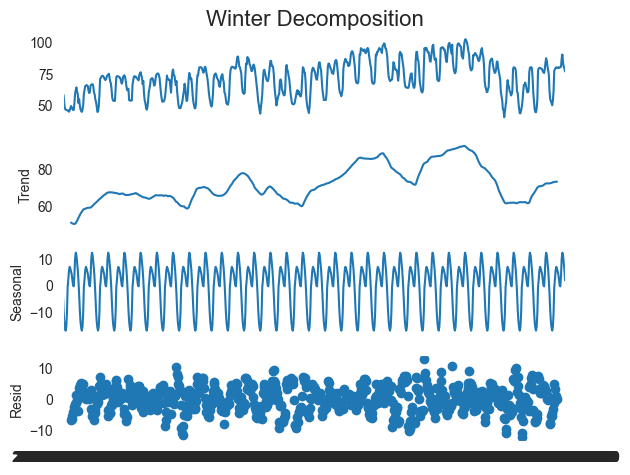

Residual mean:  -0.02428587962962615
Residual standard deviation:  4.066584782631626
Average price 71.52438172043011
Standard deviation price 13.898674818647445


In [5]:
# Import winter samples
winter_samples = y["2017-01-01 0.00":"2017-01-31 23.00"]
result = multiseasonal_decomposition(winter_samples)

period = 24 
hyp_threshold = 0.05  # Affirm Gaussian data or JSU if p_value >5%

Normal_JSU_test(result, hyp_threshold, period)

# plot the decomposition
fig = result.plot()
fig.suptitle('Winter Decomposition', fontsize=16)
for ax in fig.get_axes():
    ax.set_title("")
plt.show()

mu = np.mean(result.resid[12: -12])
std = np.std(result.resid[12:-12])
print("Residual mean: ", mu)
print("Residual standard deviation: ", std)
print("Average price", np.mean(winter_samples))
print("Standard deviation price", np.std(winter_samples))


Spring Samples analysis

Jarque-bera Test at hour 0.00 57.35 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 0.00 91.2 % JSU assumpition good
Jarque-bera Test at hour 1.00 73.9 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 1.00 99.75 % JSU assumpition good
Jarque-bera Test at hour 2.00 57.88 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 2.00 75.73 % JSU assumpition good
Jarque-bera Test at hour 3.00 83.15 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 3.00 83.85 % JSU assumpition good
Jarque-bera Test at hour 4.00 68.96 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 4.00 88.52 % JSU assumpition good
Jarque-bera Test at hour 5.00 76.06 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 5.00 95.96 % JSU assumpition good
Jarque-bera Test at hour 6.00 13.86 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 6.00 97.16 % JSU assumpition good
Jarque-bera Test at hour 7.00 26.31 % Normality assumpition good
Kolmogorov-Smirnov T

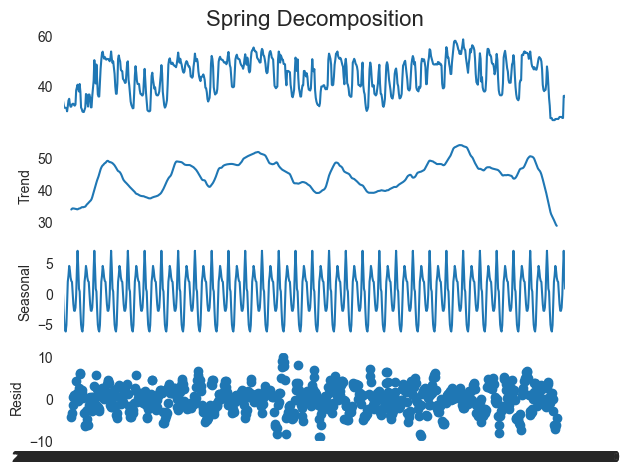

Residual mean:  0.0013891882183929127
Residual standard deviation:  3.0981960892362608
Average price 44.178
Standard deviation price 7.336949820372678


In [6]:
# Spring data (examination on April)
spring_samples = y["2017-04-01 0.00":"2017-04-30 23.00"]
result = multiseasonal_decomposition(spring_samples)

period = 24 
hyp_threshold = 0.05  # Affirm Gaussian data or JSU if p_value >5%

Normal_JSU_test(result, hyp_threshold, period)

# plot the decomposition
fig = result.plot()
fig.suptitle('Spring Decomposition', fontsize=16)
for ax in fig.get_axes():
    ax.set_title("")
plt.show()

mu = np.mean(result.resid[12: -12])
std = np.std(result.resid[12:-12])
print("Residual mean: ", mu)
print("Residual standard deviation: ", std)
print("Average price", np.mean(spring_samples))
print("Standard deviation price", np.std(spring_samples))

Summer Samples analysis

Jarque-bera Test at hour 0.00 21.72 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 0.00 94.97 % JSU assumpition good
Jarque-bera Test at hour 1.00 57.74 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 1.00 96.69 % JSU assumpition good
Jarque-bera Test at hour 2.00 35.87 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 2.00 93.57 % JSU assumpition good
Jarque-bera Test at hour 3.00 5.11 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 3.00 91.49 % JSU assumpition good
Jarque-bera Test at hour 4.00 53.28 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 4.00 99.69 % JSU assumpition good
Jarque-bera Test at hour 5.00 79.91 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 5.00 98.08 % JSU assumpition good
Jarque-bera Test at hour 6.00 80.15 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 6.00 88.57 % JSU assumpition good
Jarque-bera Test at hour 7.00 66.54 % Normality assumpition good
Kolmogorov-Smirnov 

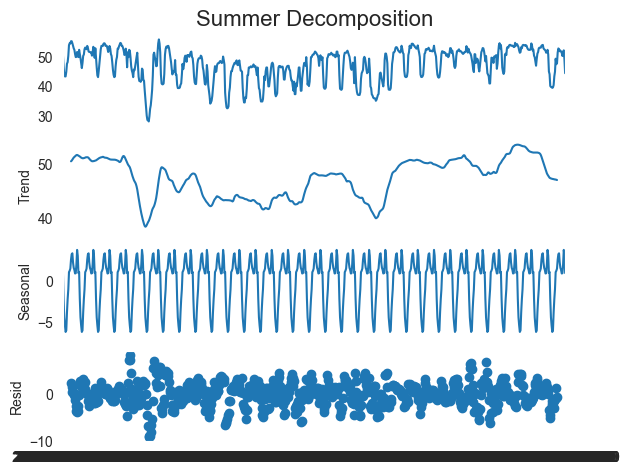

Residual mean:  -0.017407986111107835
Residual standard deviation:  2.442462288618257
Average price 47.43482526881721
Standard deviation price 5.50176117663588


In [7]:
# Summer data (examination on August)
summer_samples = y["2017-08-01 0.00":"2017-08-31 23.00"]
result = multiseasonal_decomposition(summer_samples)

period = 24 
hyp_threshold = 0.05  # Affirm Gaussian data or JSU if p_value >5%

Normal_JSU_test(result, hyp_threshold, period)

# plot the decomposition
fig = result.plot()
fig.suptitle('Summer Decomposition', fontsize=16)
for ax in fig.get_axes():
    ax.set_title("")
plt.show()

mu = np.mean(result.resid[12: -12])
std = np.std(result.resid[12:-12])
print("Residual mean: ", mu)
print("Residual standard deviation: ", std)
print("Average price", np.mean(summer_samples))
print("Standard deviation price", np.std(summer_samples))

Autumn Samples analysis

Jarque-bera Test at hour 0.00 61.98 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 0.00 98.81 % JSU assumpition good
Jarque-bera Test at hour 1.00 60.87 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 1.00 93.0 % JSU assumpition good
Jarque-bera Test at hour 2.00 79.01 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 2.00 97.18 % JSU assumpition good
Jarque-bera Test at hour 3.00 2.34 % Normality assumption fail
Kolmogorov-Smirnov Test at hour 3.00 96.0 % JSU assumpition good
Jarque-bera Test at hour 4.00 38.13 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 4.00 31.06 % JSU assumpition good
Jarque-bera Test at hour 5.00 33.07 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 5.00 92.38 % JSU assumpition good
Jarque-bera Test at hour 6.00 67.87 % Normality assumpition good
Kolmogorov-Smirnov Test at hour 6.00 70.23 % JSU assumpition good
Jarque-bera Test at hour 7.00 74.59 % Normality assumpition good
Kolmogorov-Smirnov Tes

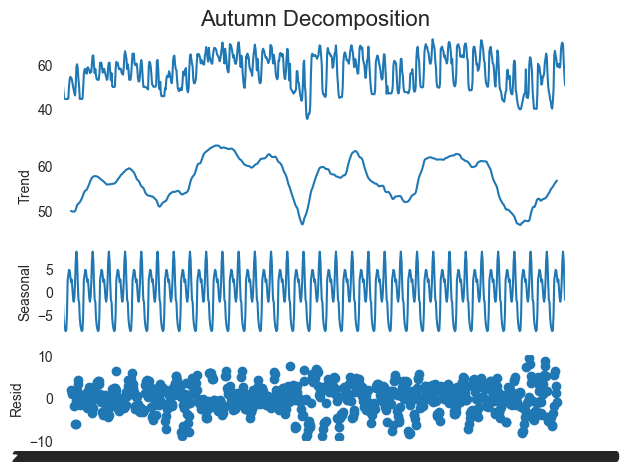

Residual mean:  -0.007713541666662567
Residual standard deviation:  3.238514419216984
Average price 56.99200940860216
Standard deviation price 7.6811828639492505


In [8]:
# Autumn data (examination on October)
autumn_samples = y["2017-10-01 0.00":"2017-10-31 23.00"]
result = multiseasonal_decomposition(autumn_samples)


period = 24 
hyp_threshold = 0.05  # Affirm Gaussian data or JSU if p_value >5%

Normal_JSU_test(result, hyp_threshold, period)

# plot the decomposition
fig = result.plot()
fig.suptitle('Autumn Decomposition', fontsize=16)
for ax in fig.get_axes():
    ax.set_title("")
plt.show()

mu = np.mean(result.resid[12: -12])
std = np.std(result.resid[12:-12])
print("Residual mean: ", mu)
print("Residual standard deviation: ", std)
print("Average price", np.mean(autumn_samples))
print("Standard deviation price", np.std(autumn_samples))

# Correlation Analysis

Correlation matrix among the features

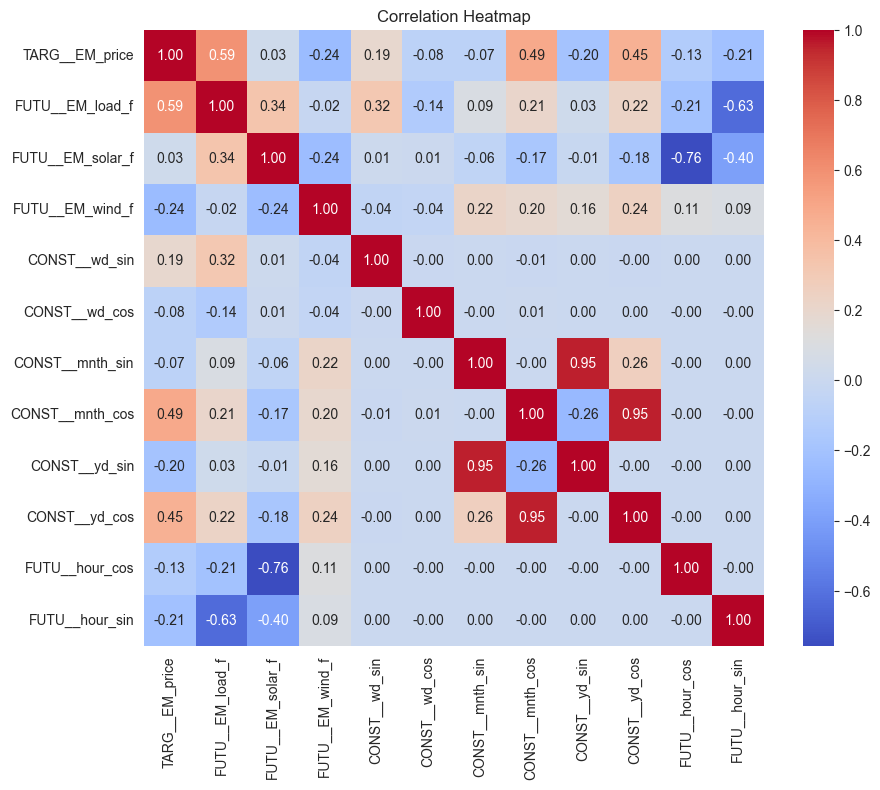

In [9]:
# Compute the correlation matrix
correlation_matrix = data_2017.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Plot the autoregressive correlation

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

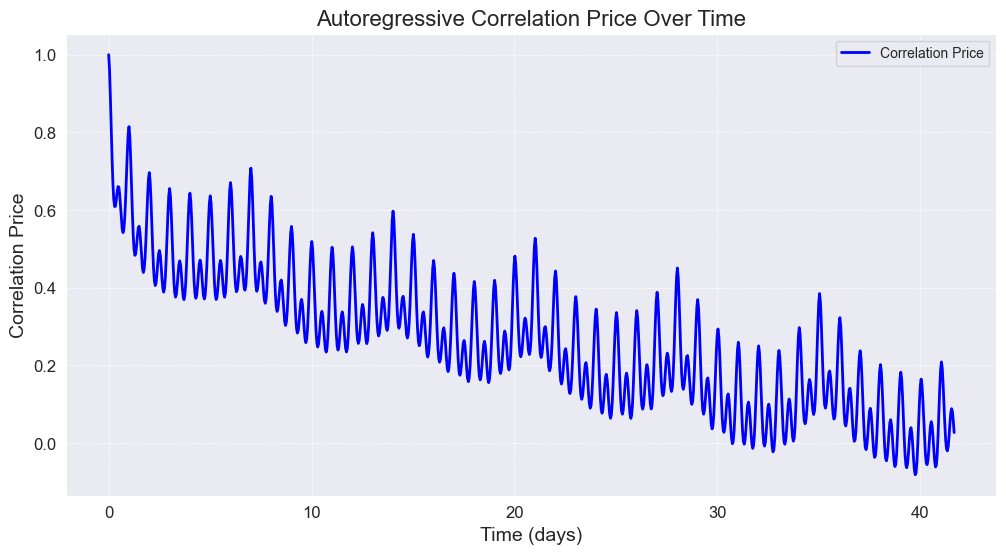

In [36]:
def corr_autoreg(Time_series):
  cov_list = [1]
  for ii in range(1, 1000):
      Covariance_matrix = np.cov(Time_series.iloc[ii:].values,Time_series.iloc[:-ii].values) 
      Corr = Covariance_matrix[0,1]/(np.sqrt(Covariance_matrix[0,0]*Covariance_matrix[1,1]))
      cov_list.append(Corr)
  return cov_list

# Compute the price autocorrelation 
Corr_price= corr_autoreg(y)
x = np.linspace(0, len(Corr_price) / 24, len(Corr_price))

# Plot the results
plt.figure(figsize=(12, 6))  
plt.plot(x, Corr_price, label='Correlation Price', color='blue', linewidth=2) 
plt.title('Autoregressive Correlation Price Over Time', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Correlation Price', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
